In [ ]:
!pip install statsmodels==0.14.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 20.1 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.2
    Uninstalling statsmodels-0.14.2:
      Successfully uninstalled statsmodels-0.14.2


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [ ]:
df = pd.DataFrame(columns=['date', 'num_hours'])
df['date'] = range(11)
df['num_hours'] = [17150000, 25800000, 19250000, 11580000, 14880000, 18340000, 20280000, 11900000, 18200000, 19400000, 21500000]
df

,date,num_hours
0,0,17150000
1,1,25800000
2,2,19250000
3,3,11580000
4,4,14880000
5,5,18340000
6,6,20280000
7,7,11900000
8,8,18200000
9,9,19400000


In [ ]:
from pathlib import Path
filepath = Path('si.csv', index=False)
df.to_csv(filepath)

In [ ]:
df_yearly = pd.DataFrame(columns = ['year', 'num_hours'])
df_yearly['year'] = ["S1", "S2", "S3"]
df_yearly = df_yearly.set_index('year')
df_yearly['num_hours'] = [17150000 + 25800000 + 19250000, 11580000 + 14880000 + 18340000 + 20280000, 11900000 + 18200000 + 19400000 + 21500000]
df_yearly

,num_hours
year,
S1,62200000
S2,65080000
S3,71000000


In [ ]:
filepath2 = Path('flixsum.csv', index=False)
df_yearly.to_csv(filepath2)

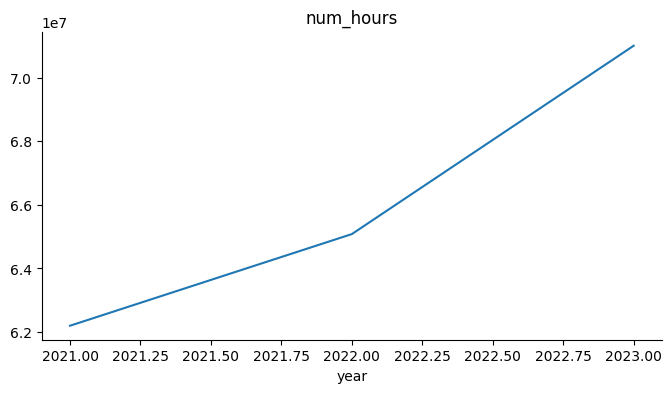

In [ ]:
# @title num_hours

from matplotlib import pyplot as plt
df_yearly['num_hours'].plot(kind='line', figsize=(8, 4), title='num_hours')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#linear regression LOL

X = df_yearly.index.values.reshape(-1, 1)
reg = LinearRegression().fit(X, df_yearly['num_hours'])

In [ ]:
reg.score(X, df_yearly['num_hours'])

0.9617422636710471

In [ ]:
reg.coef_

array([4400000.])

In [ ]:
reg.predict([[2024]])

array([74893333.33333397])